# Nama : Musthafa Zaki Bahar
# NIM  : 1301190335

In [ ]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Kasus 1

Kasus 1 (Data set: https://bit.ly/3A1Hr6l)
Data set yang digunakan untuk soal ini terkait dengan performa siswa pada ujian. Terdapat 
beberapa variable yang diasumsikan memiliki pengaruh terhadap hasil ujian siswa, yaitu: (i) 
gender, (ii) race/ethnicity, (iii) parental level of education, (iv) lunch, dan (v) test preparation 
course. Adapun performa siswa dievaluasi terhadap tiga bidang tes, yaitu (i) math, (ii) reading, 
dan (iii) writing. 
Problem

In [ ]:
#download dataset from drive
!gdown --id 1Tr5UzfNCBhl3-i9qZAQJqYNhOpEkL11R

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Tr5UzfNCBhl3-i9qZAQJqYNhOpEkL11R
To: /content/exams.csv
100% 71.8k/71.8k [00:00<00:00, 64.1MB/s]


In [ ]:
#read dataset
df_exam = pd.read_csv("exams.csv")
df_exam.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df_exam.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  73
writing score                  76
dtype: int64

In [ ]:
#Label Encoding untuk data bertipe category
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df_exam['gender']= label_encoder.fit_transform(df_exam['gender'])
df_exam['race/ethnicity']= label_encoder.fit_transform(df_exam['race/ethnicity'])
df_exam['parental level of education']= label_encoder.fit_transform(df_exam['parental level of education'])
df_exam['lunch']= label_encoder.fit_transform(df_exam['lunch'])
df_exam['test preparation course']= label_encoder.fit_transform(df_exam['test preparation course'])

In [ ]:
df_exam.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


## 1. Buatlah heatmap untuk menunjukkan korelasi seluruh variable dan skor pada data set.

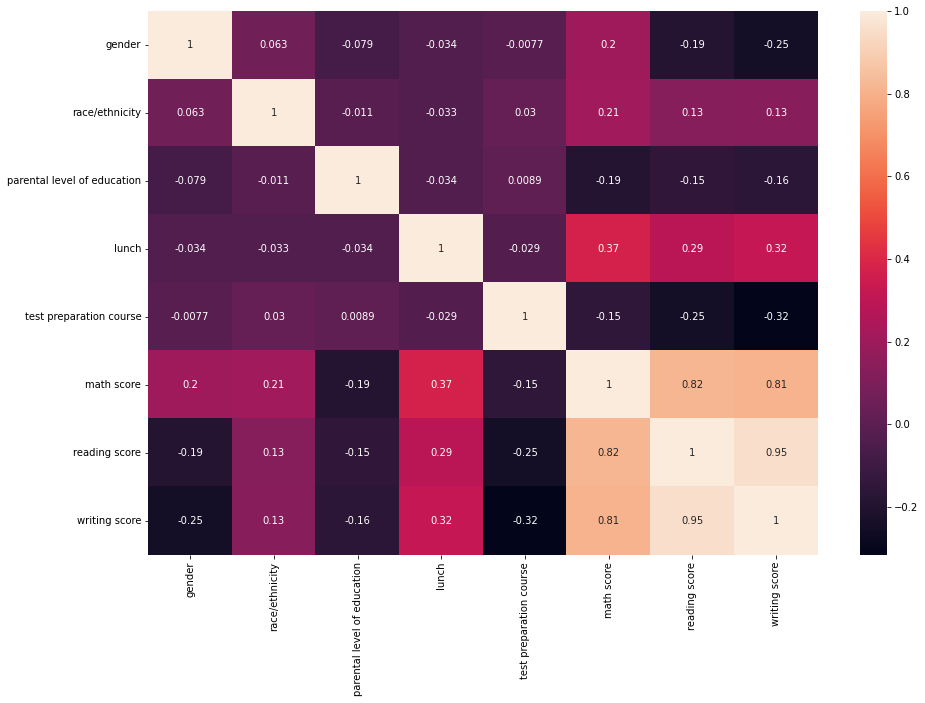

In [ ]:
df_corr_exam = df_exam.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr_exam, annot=True, ax=ax)


##2. Berdasarkan analisis korelasi, jawablah pertanyaan-pertanyaan berikut ini:

  a. Variable apa yang paling berpengaruh pada ketiga skor tersebut.

  b. Variable apa yang paling tidak berpengaruh terhadap masing-masing skor.

  c. Sebutkan dua hasil skor yang paling berkorelasi dan jelaskan kemungkinan 
penyebab korelasi tersebut

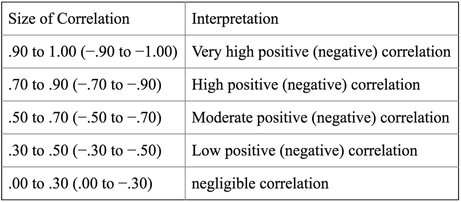

Jawaban :

a. Variable yang paling berpengaruh terhadap skor adalah variable lunch dan test preparation course. Dimana variable lunch dengan math score yang mempunyai korelasi positif di angka 0.37 dan test preparation course dengan writing score yang mempunyai korelasi negatif di angak -0.32. Dimana angka - angka tersebut masih bisa dikatakan berkolerasi rendah sesuai tabel diatas.

b. Variable yang paling tidak berpengaruh terhadap skor adalah race/ethnicity dan parential level of education. Dimana variable race/ethnicity dengan reading score dan parential level of education mempunyai korelasi positif yang sangat kecil di angka 0.13. Lalu untuk parential parential level of education dengan reading score mempunyai korelasi negatif di angka -0.15. Dimana angka - angka tersebut tidak bisa dikatakan berkorelasi atau diabaikan.

c. lunch dan test preparation course mempunyai pengaruh/nilai korelasi paling tinggi dengan masing - masing skor, dengan kemungkinan untuk lunch dengan dua nilai kategori yaitu standard dan free/reduced, yang menandakan makan siang standard dengan free/reduced berpengaruh terhadap skor yang didapatkan oleh siswa. Sama halnya dengan test preparation course yang terdapat dua kategori yaitu completed dan none, yang menandakan siswa yang completed/none pada test preparation course berpengaruh terhadap skor yang didapatkan.

# Kasus 2

Kasus 2
Buatlah plot 3 dimensi dengan menggunakan surface plot dan contour plot untuk fungsi
f(x, y) = sin(x)2 + cos(y)2
untuk rentang nilai x dan y antara -5 dan 5.

In [ ]:
def getZ(X, Y):
    return (np.sin(X)**2) + (np.cos(Y)**2)

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(X, Y)
Z = getZ(X, Y)

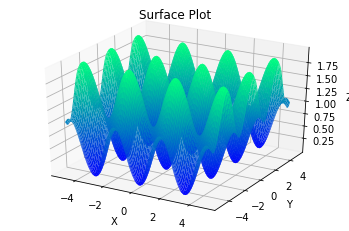

In [ ]:
# Surface Plot
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface (X, Y, Z
                , rstride=1 # default value is one
                , cstride=1 # default value is one
                , cmap='winter'
                , edgecolor='none'
                )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Plot');
plt.show()

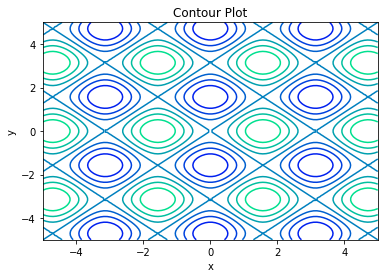

In [ ]:
# Contour Plot
fig = plt.figure()
ax = plt.axes()

ax.contour  (X, Y, Z
            , cmap = 'winter'
            );
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour Plot');
plt.show()

##   
a. Tentukanlah jumlah titik minimum yang berada di area tersebut.

b. Tentukanlah jumlah titik maksimum yang berada di area tersebut.

Jawaban :

a. Titik minimum adalah titik yang ditandai dengan warna biru tua dengan jumlah 12

b. Titik maksimum adalah titik yang ditandai dengan warna hijau dengan jumlah 12 

# Kasus 3

Kasus 3 (Data set: https://bit.ly/3tdBRtN)
Data set yang digunakan pada kasus ini terkait dengan jumlah penumpang suatu maskapai 
penerbangan dari bulan Januari 1949 sampai bulan Desember 1960. 

In [ ]:
#download dataset from drive
!gdown --id 1JNFFs0xFD3oPXzXIb6twJC8vxvRRemmV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JNFFs0xFD3oPXzXIb6twJC8vxvRRemmV
To: /content/AirPassengers.csv
100% 1.75k/1.75k [00:00<00:00, 1.53MB/s]


In [ ]:
#read dataset
df_pass = pd.read_csv("AirPassengers.csv")
df_pass.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df_pass['Month'] = pd.to_datetime(df_pass['Month'])  

In [ ]:
df_pass.head(5)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# get data 1950 - 1959
mask = (df_pass['Month'] > '1949-12-01') & (df_pass['Month'] <= '1959-12-01')
df_pass_n = df_pass.loc[mask]
df_pass_n.head(2)

,Month,#Passengers
12,1950-01-01,115
13,1950-02-01,126


In [ ]:
df_pass_n.tail(2)

,Month,#Passengers
130,1959-11-01,362
131,1959-12-01,405


In [ ]:
#reset index
df_pass_n.index = df_pass_n["Month"]
df_pass_n.head()

,Month,#Passengers
Month,,
1950-01-01,1950-01-01,115
1950-02-01,1950-02-01,126
1950-03-01,1950-03-01,141
1950-04-01,1950-04-01,135
1950-05-01,1950-05-01,125


##a) Buatlah plot data time series jumlah penumpang dari tahun 1950 sampai tahun 1959.



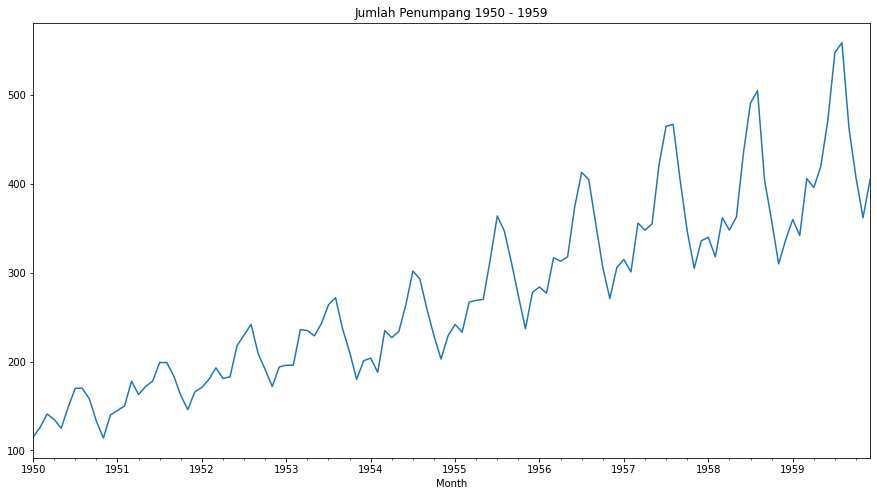

In [ ]:
df_pass_n["#Passengers"].plot(figsize = (15,8))
plt.title("Jumlah Penumpang 1950 - 1959")
plt.show()

##b) Hitunglah kenaikan atau penurunan jumlah penumpang tiap bulannya, lalu buat plotnya.

In [ ]:
pertumbuhan = [0]
for i in range(1,120):
    pertumbuhan.append(df_pass_n["#Passengers"][i]-df_pass_n["#Passengers"][i-1])

df_pass_n["Pertumbuhan"]=pertumbuhan
df_pass_n.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Month,#Passengers,Pertumbuhan
Month,,,
1950-01-01,1950-01-01,115,0
1950-02-01,1950-02-01,126,11
1950-03-01,1950-03-01,141,15
1950-04-01,1950-04-01,135,-6
1950-05-01,1950-05-01,125,-10


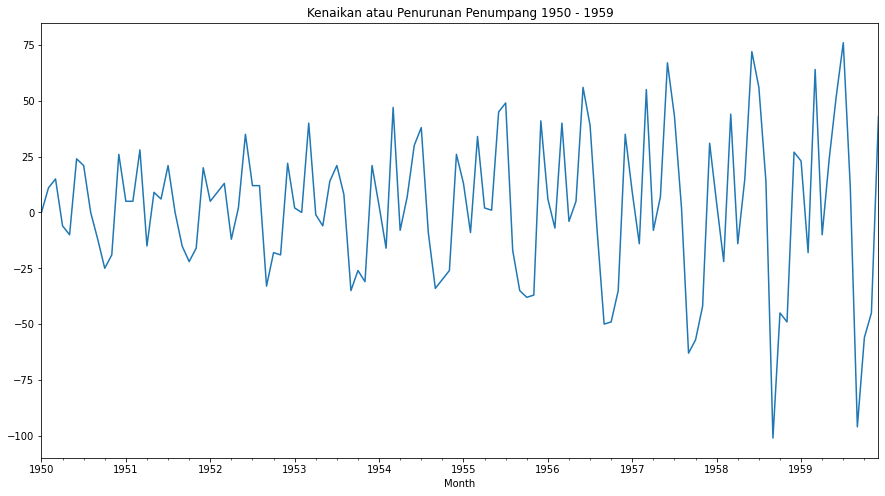

In [ ]:
df_pass_n["Pertumbuhan"].plot(figsize = (15,8))
plt.title("Kenaikan atau Penurunan Penumpang 1950 - 1959")
plt.show()

##c) Buatlah histogram untuk menunjukkan distribusi angka kenaikan atau penurunan jumlah penumpang.

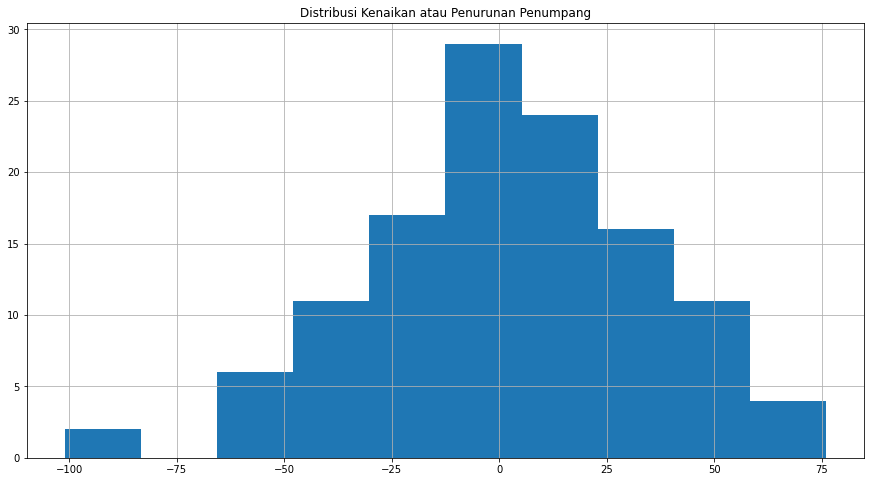

In [ ]:
df_pass_n["Pertumbuhan"].hist(figsize = (15,8))
plt.title("Distribusi Kenaikan atau Penurunan Penumpang")
plt.show()